<a href="https://colab.research.google.com/github/ag2matheus/ModelagemEmEcologiaEEvolucao/blob/main/%5BMatheus%5D_MEE_2024_Tutorial_Integra%C3%A7%C3%A3o_Num%C3%A9rica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolvendo EDOs numericamente com python

## Como funciona a integração numérica

*Uma breve introdução se você nunca estudou cálculo numérico*

Vamos supor que temos uma equação diferencial para a qual não sabemos como (ou não queremos) obter sua solução (analítica). Ainda assim, podemos descobrir quais são as soluções por meio da **integração numérica**. Como isso funciona?

A ideia é aproximar a solução em  pequenos intervalos de tempo sucessivos, extrapolando o valor da derivada em cada intervalo. Por exemplo, considere a equação diferencial:

$$ \frac{dx}{dt} = f(x) = x (1 - x) $$

com um valor inicial de $x_0 = 0,1$ em um tempo inicial $t=0$ (ou seja, $x(0) = 0,1$). Em $t=0$, a derivada $\frac{dx}{dt}$ tem o valor de $f(0,1) = 0,1 \times (1-0,1) = 0,09$. Escolhemos um pequeno intervalo, digamos, $\Delta t = 0,5$, e assumimos que esse valor da derivada é uma boa aproximação durante todo o intervalo de $t=0$ até $t=0,5$. Isso significa que nesse tempo, $x$ aumentará em $\frac{dx}{dt} \times \Delta t = 0,09 \times 0,5 = 0,045$. Portanto, nossa solução aproximada para $x$ em $t=0,5$ é $x(0) + 0,045 = 0,145$. Podemos então usar esse valor de $x(0,5)$ para calcular o próximo ponto no tempo, $t=1$. Calculamos a derivada em cada etapa, multiplicamos pelo passo de tempo e adicionamos ao valor anterior da solução, como na tabela abaixo:

|  t  | x        | $\frac{dx}{dt}$  |
| ---:|---------:|----------:|
| 0   | 0,1      |  0,09     |
| 0,5 | 0,145    |  0,123975 |
| 1,0 | 0,206987 |  0,164144 |
| 1,5 | 0,289059 |  0,205504 |
| 2,0 | 0,391811 |  0,238295 |

Claro que isso é extremamente tedioso de fazer à mão, então podemos escrever um programa simples para fazer isso e plotar a solução. Abaixo, comparamos isso com a conhecida solução analítica desta equação diferencial (a *equação logística*). **Não se preocupe com o código por enquanto**: existem maneiras melhores e mais simples de fazê-lo!

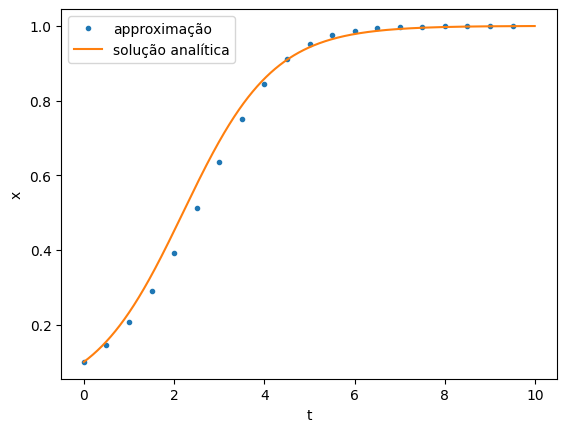

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as pt

# intervalos de tempo
dt = 0.5
tt = np.arange(0, 10, dt)
# condição inicial
xx = [0.1]

def f(x):
    return x * (1-x)

# loop sobre os tempos
for t in tt[1:]:
    xx.append(xx[-1] + dt * f(xx[-1]))

# plotando
pt.plot(tt, xx, '.')
ta = np.arange(0, 10, 0.01)
pt.plot(ta, 0.1 * np.exp(ta)/(1+0.1*(np.exp(ta)-1.)))
pt.xlabel('t')
pt.ylabel('x')
pt.legend(['approximação', 'solução analítica'], loc='best',)

## Por que usar bibliotecas científicas?

O método que acabamos de usar acima é chamado de *método de Euler* e é o mais simples disponível. O problema é que, embora funcione razoavelmente bem para a equação diferencial mencionada anteriormente, em muitos casos, ele não apresenta um desempenho muito bom. Existem muitas maneiras de melhorá-lo; na verdade, existem muitos livros dedicados inteiramente a este assunto. Embora muitos estudantes de matemática ou física aprendam a implementar métodos mais sofisticados, o tópico é realmente complexo. Felizmente, podemos contar com a experiência de muitas pessoas para criar bons algoritmos que funcionam bem na maioria das situações.

## Então, como... ?

Vamos demonstrar como usar bibliotecas científicas para integrar equações diferenciais. Embora os comandos específicos dependam do software, o procedimento é geralmente o mesmo:

* defina a função derivada (o lado direito da equação diferencial)
* escolha um passo de tempo ou uma sequência de tempos nos quais deseja obter a solução
* forneça os parâmetros e a condição inicial
* passe a função, a sequência de tempo, os parâmetros e as condições iniciais para uma rotina que faz a integração.

## Uma única equação

Vamos começar com a mesma equação mencionada anteriormente, a equação logística, agora com quaisquer parâmetros para a taxa de crescimento e a capacidade de suporte:

$$ \frac{dx}{dt} = f(x) = r x \left(1 - \frac{x}{K} \right) $$

com $r=2$, $K=10$ e $x(0) = 0.1$. Vamos mostrar como integrá-la usando Python abaixo, introduzindo a sintaxe da linguagem conforme necessário.

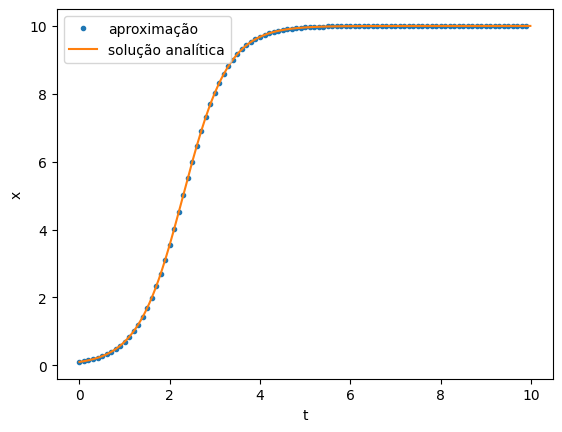

In [ ]:
# Importamos as bibliotecas que vamos usar
import numpy as np
# Importamos funções interativas de plotagem, como plot, xlabel etc.
from matplotlib import pyplot as pt
# Importamos o integrador numérico que usaremos, odeint()
from scipy.integrate import odeint

# Passos de tempo: um array de valores começando em 0 indo até (mas
# excluindo) 10, em passos de 0.01
t = np.arange(0, 10., 0.1)
# Parâmetros
r = 2.
K = 10.
# Condição inicial
x0 = 0.1

# Vamos definir o lado direito da equação diferencial
# Deve ser uma função da variável dependente (x) e do
# tempo (t), mesmo que o tempo não apareça explicitamente
# É assim que você define uma função:
def f(x, t, r, K):
    # Em Python, não há chaves '{}' para começar ou
    # encerrar uma função, nem nenhuma palavra-chave especial: o bloco é
    # definido por espaços iniciais (normalmente 4)
    # A aritmética é feita da mesma forma que em outras linguagens: + - * /
    return r * x * (1-x/K)

# Chamamos a função que realiza a integração
# A ordem dos argumentos é a seguinte: a função derivada,
# a condição inicial, os pontos onde queremos a solução e
# uma lista de parâmetros
x = odeint(f, x0, t, (r, K))

# Plotamos a solução
pt.plot(t, x, '.')
pt.xlabel('t') # Definimos o rótulo do eixo x
pt.ylabel('x') # e do eixo y
# Plotamos a solução analítica
# Observe que `tt` é um array: quando você realiza qualquer operação aritmética
# com um array, é o mesmo que fazê-lo para cada elemento
tt = np.arange(0, 10, 0.01)
pt.plot(tt, K * x0 * np.exp(r*tt)/(K+x0*(np.exp(r*tt)-1.)))
pt.legend(['aproximação', 'solução analítica'], loc='best') # desenha a legenda

## Mais de uma equação

Agora, e se quiséssemos integrar um sistema de equações diferenciais? Vamos pegar as equações de Lotka-Volterra:

$$ \begin{aligned}
\frac{dV}{dt} &= r V - c V P\\
\frac{dP}{dt} &= e c V P - dP
\end{aligned}$$

Neste caso, a variável não é mais um número, mas sim um vetor `[V, P]`. Fazemos o mesmo que antes, mas agora `x` será um vetor (*array*):

formato de x: (500, 2)


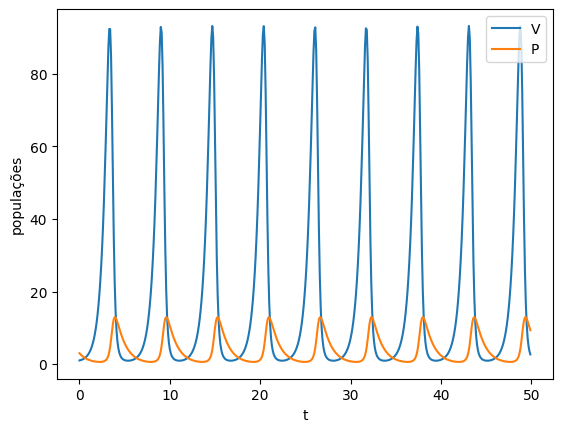

In [ ]:
# Não precisamos fazer isso novamente: se a célula acima já foi executada,
# as bibliotecas estão importadas, mas repetimos isso aqui para conveniência.
import numpy as np
from matplotlib import pyplot as pt
from scipy.integrate import odeint

t = np.arange(0, 50., 0.1)

# Parâmetros
r = 2.
c = 0.5
e = 0.1
d = 1.

# Condição inicial: agora é um vetor!
x0 = np.array([1., 3.])

# A função ainda recebe apenas `x`, mas agora será um vetor, não um número
def LV(x, t, r, c, e, d):
    # Em Python, os vetores são numeradas a partir do 0, então o primeiro elemento
    # é x[0] e o segundo é x[1]. Os colchetes `[ ]` definem uma lista, que é convertida
    # em um vetor usando a função `array()`.
    # Observe que a primeira entrada corresponde a dV/dt e a segunda a dP/dt
    return np.array([ r*x[0] - c * x[0] * x[1],
                      e * c * x[0] * x[1] - d * x[1] ])

# Chamamos a função que realiza a integração
# A ordem dos argumentos é a seguinte: a função derivada,
# a condição inicial, os pontos onde queremos a solução e
# uma lista de parâmetros
x = odeint(LV, x0, t, (r, c, e, d))

# Agora `x` é um vetor de 2 dimensões de tamanho 5000 x 2 (5000 passos de tempo
# por 2 variáveis). Podemos verificá-lo assim:
print('formato de x:', x.shape)

# Plotamos a solução
pt.plot(t, x)
pt.xlabel('t') # definimos o rótulo do eixo x
pt.ylabel('populações') # e do eixo y
pt.legend(['V', 'P'], loc='upper right')

Uma coisa interessante a fazer aqui é olhar o *espaço de fase*, ou seja, plotar apenas as variáveis dependentes, independentemente do tempo:

Condição inicial: [1. 3.]


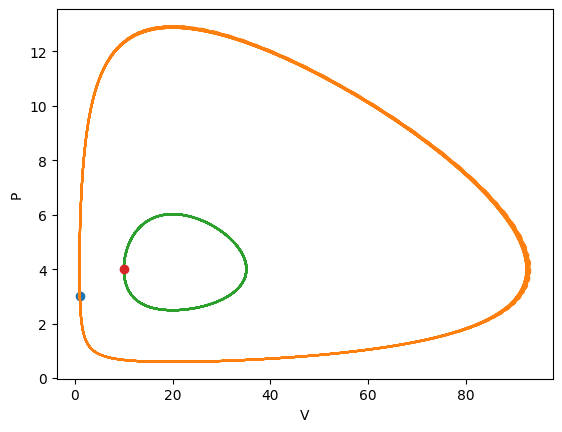

In [ ]:
# `x[0,0]` é o primeiro valor (1ª linha, 1ª coluna), `x[0,1]` é o valor da
# 1ª linha, 2ª coluna, que corresponde ao valor de P no tempo inicial. Primeiro, plotamos apenas esse ponto para saber de onde partimos:
pt.plot(x[0,0], x[0,1], 'o')
print('Condição inicial:', x[0])

# `x[0]` ou (equivalente) x[0,:] é a primeira linha, e `x[:,0]` é a primeira
# coluna. Observe que o dois pontos `:` representam todos os valores desse eixo. Vamos plotar a segunda coluna (P) em relação à primeira (V):
pt.plot(x[:,0], x[:,1])
pt.xlabel('V')
pt.ylabel('P')

# Vamos calcular e plotar outra solução com uma condição inicial diferente
x2 = odeint(LV, [10., 4.], t, (r, c, e, d))
pt.plot(x2[:,0], x2[:,1])
pt.plot(x2[0,0], x2[0,1], 'o')

**Parabéns**: agora você está pronto para integrar qualquer sistema de equações diferenciais! (Esperamos que generalizar o que foi mostrado acima para mais de 2 equações não seja muito desafiador).